# Downloading DFO Historical Mooring Data

#### [https://data.cioospacific.ca/erddap/tabledap/IOS_CTD_Moorings.htm](https://data.cioospacific.ca/erddap/tabledap/IOS_CTD_Moorings.htm)

## Constraints:
Limited the search area to the mooring of interest E01. (49.1 - 49.3 & 125.99 - 126.7) <br>




## DFO Pacific Mooring Sites (E01 is in blue)

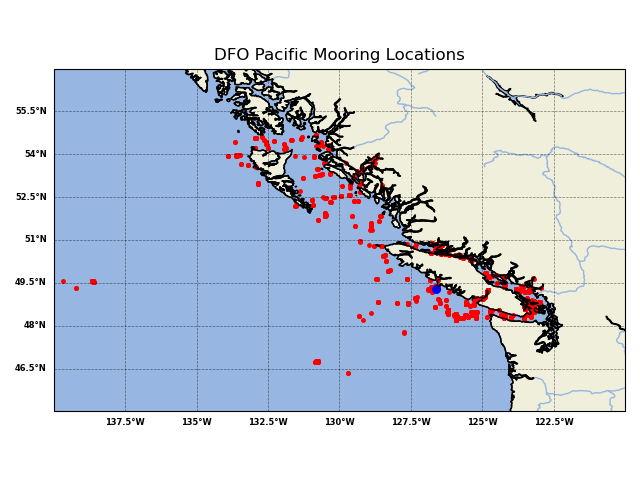

/tmp/ipykernel_16973/2798140817.py:11: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['latdeg', 'latmin', 'dir']] = df['Latitude'].str.split(' ', 2, expand=True)
/tmp/ipykernel_16973/2798140817.py:14: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['londeg', 'lonmin', 'dir']] = df['Longitude'].str.split(' ', 2, expand=True)


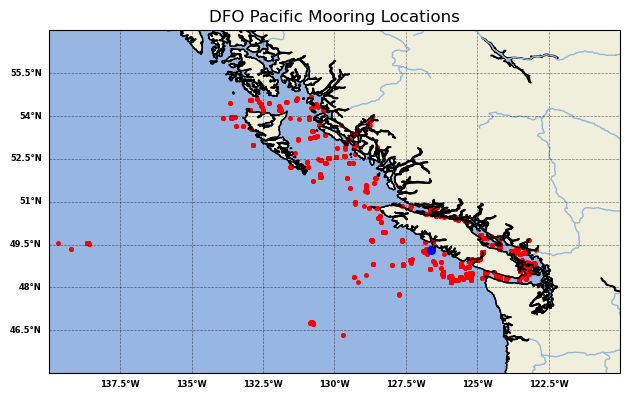

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter, LatitudeLocator
import cartopy

def plot_moorings():
    df = pd.read_csv("Master_Mooring_List.csv", skiprows=2)
    
    # convert deg min to decimal
    df[['latdeg', 'latmin', 'dir']] = df['Latitude'].str.split(' ', 2, expand=True)
    df['latdeg'] = pd.to_numeric(df['latdeg'])
    df['latmin'] = pd.to_numeric(df['latmin'])
    df[['londeg', 'lonmin', 'dir']] = df['Longitude'].str.split(' ', 2, expand=True)
    df['londeg'] = pd.to_numeric(df['londeg'])
    df['lonmin'] = pd.to_numeric(df['lonmin'])
    df['latsig'] = df['latmin']/60
    df['Lat'] = df['latdeg'] + df['latsig']
    df['lonsig'] = df['lonmin']/60
    df['Lon'] = (df['londeg'] + df['lonsig'])*-1
    
    lon = df.Lon.values
    lat = df.Lat.values
    
    eo1lon = -126.6
    eo1lat = 49.3
    
    left_lon, right_lon, bot_lat, top_lat = -140, -120, 45, 57
    
    Map = plt.axes(projection=ccrs.PlateCarree())
    Map.set_extent(
        [left_lon, right_lon, bot_lat, top_lat]
    )  # try left_lon, right_lon, bot_lat, top_lat
    x, y = (lon, lat)
    
    Map.coastlines()
    Map.add_feature(cartopy.feature.OCEAN)
    Map.add_feature(cartopy.feature.LAND, edgecolor='black')
    Map.add_feature(cartopy.feature.LAKES, edgecolor='black')
    Map.add_feature(cartopy.feature.RIVERS)
    gl = Map.gridlines(
        crs=ccrs.PlateCarree(),
        linewidth=0.5,
        color="black",
        alpha=0.5,
        linestyle="--",
        draw_labels=True,
    )
    gl.top_labels = False
    gl.left_labels = True
    gl.bottom_labels = True
    gl.right_labels = False
    gl.ylocator = LatitudeLocator()
    gl.xformatter = LongitudeFormatter()
    gl.yformatter = LatitudeFormatter()

    gl.xlabel_style = {"color": "black", "weight": "bold", "size": 6}
    gl.ylabel_style = {"color": "black", "weight": "bold", "size": 6}
    
    

    cax = plt.scatter(x, y, transform=ccrs.PlateCarree(), marker=".", color="red", s=25)
    plt.scatter(eo1lon, eo1lat, color='blue', s=30)
    plt.title("DFO Pacific Mooring Locations")
    plt.tight_layout()
    plt.savefig("DFO_Mooring_Locations.png")
    plt.show()
    plt.close()
  
plot_moorings()
    
    
    

In [2]:
import xarray as xr

# have a look at the dataset:

#ds = xr.open_dataset("IOS_CTD_Moorings_9614_794f_0026.nc")
ds = xr.open_dataset("IOS_CTD_Moorings_all_yrs.nc")
#ds = xr.open_dataset("IOS_CTD_Moorings_allyrs2.nc")
#print(ds)
#print(ds.PSALST01.data)
#print(ds.DOXYZZ01)
#print(ds.DOXMZZ01)
#print(ds.filename.data)
#print(ds.variables)
#print(ds.time)



FileNotFoundError: [Errno 2] No such file or directory: '/home/jovyan/ohw23_proj_fancymoorings/IOS_CTD_Moorings_all_yrs.nc'

## Combine what was learned Below - use a merged Temperature variable for the time series - do not plot Oxygen

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_dfo_mooring(dpth, mind, maxd, fstrt1, fstrt2):  #was mooring_depth but that doesn't work with whole time series
    """ function to plot mooring data.  Must know the sensor depths and find data in the depth range of
    the sensor.  Recent filenames would allow a string split to find the depths but this isn't the case
    historically.  We know for E01 that the depths are 35, 75 and 90 in recent years.  
    For this function we are going to grab data with 'x'm of the sensor depths. """

    df = pd.DataFrame()
    
    df['Salt'] = ds.sea_water_practical_salinity.data
    df['Temp1'] = ds.sea_water_temperature.data
    df['Temp2'] = ds.TEMPST01.data
    # Get a final temp
    df['Temp'] = np.where(df['Temp1'].isnull(), df['Temp2'], df['Temp1'])
    df['depth'] = ds.depth.data
    df['Time'] = ds.time.data
    
    #df['Time'] = pd.to_datetime(df['Time'].dt.strftime('%Y-%m-%dT%H:%M:%SZ')) # this doesn't change anything
    
    
    df['lat'] = ds.latitude.values
    df['lon'] = ds.longitude.values
    #latmx = df['lat'].max()
    #print(latmx)
    #latmn = df['lat'].min()
    #print(latmn)
    #lonmx = df['lon'].max()
    #print(lonmx)
    #lonmn = df['lon'].min()
    #print(lonmn)
    #print(df['Salt'].min())
    #print(df['Time'][0])
    
    
    #  Need to figure a better way to capture sensor depths - using this from the filename for now
    df['filename'] = ds.filename.data
    #uniq = df['filename'].unique()
    #print(uniq)
    
    drop_files = ['tof1_20150801_20160714_0032m.ctd', 'cyp1_20160714_20171004_0062m_L1.ctd',
                 'fortune1_20171006_20181011_0090m_L2.ctd',
                 'millar1_20171006_20181011_0017m_L2.ctd'] 
    
    # keep only the data with filename starting with e01 or E01
    #df = df[(df['filename'].str[0:3] == fstrt1) or (df['filename'].str[0:3] == fstrt2)]
    # fix this to make it work
    
    df = df[~df['filename'].isin(drop_files)]
    
    #  Look at one file only 
    
    #df= df[df['filename'] == 'e01_20150801_20160712_0035m.ctd']
    #print(df)

    
    
    #df['file_depth'] = df['filename'].str[-10:-8]#.astype(int)  #doesn't work with all filenames 
    #print(df['file_depth'])
    
    
    # This method doesn't work with the whole time series
    #df_depth = df[df['file_depth'] == mooring_depth]
    
    # Use a max/min range to capture data around the sensor depth
    df_depth = df[df['depth'].between(mind, maxd)]
    
    df.sort_values('Time', ascending=True)
    
    #print(df_depth['filename'].unique())

    x = df_depth.Time
    salt = df_depth.Salt
    temp = df_depth.Temp

   
    #  try to put labels on the blank shared x axis
    #tcks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    #tklbls = ["2018-01", "2018-07", "2019-01", "2019-07", "2020-01", "2020-07", "2021-01", "2021-07", "2022-01", "2022-01"]
    
    fig, ax = plt.subplots(2, figsize=(15, 8), sharex=True)
   
    ax[0].plot(x, salt, linewidth=0.05, c='blue')
    ax[0].set_title('Salinity (PSU)')
   
    ax[1].plot(x, temp, linewidth=0.5, c='orange')
    ax[1].set_title("Temperature (C)")
    
    
    fig.subplots_adjust(hspace=0.5)
    plt.suptitle("DFO Mooring Station E01 at depth {} metres".format(str(dpth)))
    plt.show()
    
plot_dfo_mooring(dpth = 35, mind = 32, maxd=38, fstrt1 = 'e01', fstrt2='E01')

### Have a look at the various salinity variables.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_dfo_salt(dpth, mind, maxd, fstrt1, fstrt2):
    

    df = pd.DataFrame()
    
    df['sea_water_practical_salinity'] = ds.sea_water_practical_salinity.data
    df['PSALST01'] = ds.PSALST01.data
    df['PSALST02'] = ds.PSALST02.data
    df['SSALST01'] = ds.SSALST01.data
    df['Time'] = ds.time.data
    df['depth'] = ds.depth.data
    # method for all files
    
    drop_files = ['tof1_20150801_20160714_0032m.ctd' 'cyp1_20160714_20171004_0062m_L1.ctd',
                 'fortune1_20171006_20181011_0090m_L2.ctd'
                 'millar1_20171006_20181011_0017m_L2.ctd'] 

    df['filename'] = ds.filename.data
    df = df[~df['filename'].isin(drop_files)]
    
    
    df_depth = df[df['depth'].between(mind, maxd)]
    
    
    # another method but only works when files are all same format
    
    #  Need to figure a better way to capture sensor depths - using this from the filename for now
    #df['filename'] = ds.filename.data
    #df['file_depth'] = df['filename'].str[-10:-8].astype(int)

    # isolate the sensor depth
    #df_depth = df[df['file_depth'] == mooring_depth]

    x = df_depth.Time
    var1 = df_depth.sea_water_practical_salinity
    var2 = df_depth.PSALST01
    var3 = df_depth.PSALST02
    var4 = df_depth.SSALST01
   
    fig, ax = plt.subplots(4, figsize=(15, 8), sharex=True)
   
    ax[0].plot(x, var1, linewidth=0.05, c='blue')
    ax[0].set_title('sea_water_practical_salinity')
    ax[1].plot(x, var2, linewidth=0.5, c='orange')
    ax[1].set_title("PSALST01")
    ax[2].plot(x, var3, linewidth=0.5, c='purple')
    ax[2].set_title("PSALST02")
    ax[3].plot(x, var3, linewidth=0.5, c='purple')
    ax[3].set_title("SSALST01")
    fig.subplots_adjust(hspace=0.5)
    plt.suptitle("DFO Mooring Station E01 Salinity variables at depth {} metres".format(str(dpth)))
    plt.show()
    
plot_dfo_salt(dpth = 75, mind = 72, maxd=78, fstrt1 = 'e01', fstrt2='E01')

### Have a look at the various temperature variables.

In [ ]:
def plot_dfo_temp(dpth, mind, maxd, fstrt1, fstrt2):
    
    df = pd.DataFrame()
    
    df['sea_water_temperature'] = ds.sea_water_temperature.data
    df['TEMPST01'] = ds.TEMPST01.data
    df['TEMPS601'] = ds.TEMPS601.data
    df['TEMPS602'] = ds.TEMPS602.data
    #df['TEMPS902'] = ds.TEMPS902.data - ? doesn't exist
    df['TEMPS901'] = ds.TEMPS901.data
    df['Time'] = ds.time.data
    df['filename'] = ds.filename.data
    df['depth'] = ds.depth.data
    
    #  Need to figure a better way to capture sensor depths - using this from the filename for now
    #df['file_depth'] = df['filename'].str[-10:-8].astype(int)
    #df['depth'] = ds.depth.data
    
    #  Saw some data gaps - populated the nans with TEMPST01
    #  Merge the two temp columns
    df['merge_temp'] = np.where(df['sea_water_temperature'].isnull(), df['TEMPST01'], df['sea_water_temperature'])
    
    # isolate the sensor depth
    #df_depth = df[df['file_depth'] == mooring_depth]
    
    drop_files = ['tof1_20150801_20160714_0032m.ctd' 'cyp1_20160714_20171004_0062m_L1.ctd',
                 'fortune1_20171006_20181011_0090m_L2.ctd'
                 'millar1_20171006_20181011_0017m_L2.ctd'] 

    df['filename'] = ds.filename.data
    df = df[~df['filename'].isin(drop_files)]
    
    
    df_depth = df[df['depth'].between(mind, maxd)]
    
    
    # look at the depth range for 75m sensors - can we use this in the erddap option?
    # print(df_depth['depth'].max()) # 80.15737  
    # print(df_depth['depth'].min()) # 68.238

    x = df_depth.Time
    var1 = df_depth.sea_water_temperature
    var2 = df_depth.TEMPST01
    var3 = df_depth.TEMPS601
    var4 = df_depth.TEMPS602
    var5 = df_depth.TEMPS901
    var6 = df_depth.merge_temp
    
   
    fig, ax = plt.subplots(6, figsize=(15, 8), sharex=True, sharey=True)
   
    ax[0].plot(x, var1, linewidth=0.05, c='blue')
    ax[0].set_title('sea_water_temperature')
    ax[1].plot(x, var2, linewidth=0.5, c='orange')
    ax[1].set_title("TEMPST01")
    ax[2].plot(x, var3, linewidth=0.5, c='purple')
    ax[2].set_title("TEMPS601")
    ax[3].plot(x, var4, linewidth=0.5, c='green')
    ax[3].set_title("TEMPS601")
    ax[4].plot(x, var5, linewidth=0.5, c='red')
    ax[4].set_title("TEMPS901")
    ax[5].plot(x, var6, linewidth=0.5, c='red')
    ax[5].set_title("merge_temp")
    fig.subplots_adjust(hspace=0.5)
    plt.suptitle("DFO Mooring Station E01 Temperature variables at depth {} metres".format(str(dpth)))
    plt.show()
    
plot_dfo_temp(dpth = 35, mind = 32, maxd=38, fstrt1 = 'e01', fstrt2='E01')

### Have a look at the various oxygen variables.

In [ ]:
#  Not seeing any oxy in this time frame at any depth.

def plot_dfo_oxy(mooring_depth):
    
    df = pd.DataFrame()
    
    df['DOXYZZ01'] = ds.DOXYZZ01.data
    df['DOXMZZ01'] = ds.DOXMZZ01.data
    df['Time'] = ds.time.data
    df['filename'] = ds.filename.data
    
    #  Need to figure a better way to capture sensor depths - using this from the filename for now
    df['file_depth'] = df['filename'].str[-10:-8].astype(int)
    df['depth'] = ds.depth.data

    # isolate the sensor depth
    df_depth = df[df['file_depth'] == mooring_depth]
    

    x = df_depth.Time
    var1 = df_depth.DOXYZZ01
    var2 = df_depth.DOXMZZ01
    
   
    fig, ax = plt.subplots(2, figsize=(15, 8), sharex=True, sharey=True)
   
    ax[0].plot(x, var1, linewidth=0.05, c='blue')
    ax[0].set_title('DOXYZZ01')
    ax[1].plot(x, var2, linewidth=0.5, c='orange')
    ax[1].set_title("DOXMZZ01")

    fig.subplots_adjust(hspace=0.5)
    plt.suptitle("DFO Mooring Station E01 Oxygen variables at depth {} metres".format(str(mooring_depth)))
    plt.show()
    
plot_dfo_oxy(90)